In [1]:
import sys
sys.path.append("..")
import pandas as pd

In [2]:
from ethicml.algorithms.inprocess import LR, SVM, Agarwal, Kamiran, Kamishima, LRCV, ZafarEqOpp
from ethicml.evaluators import CrossValidator, run_metrics, evaluate_models_async
from ethicml.data import Compas, Adult, load_data
from ethicml.metrics import Accuracy, ProbPos, TPR, TNR, AbsCV, ProbPos
from ethicml.preprocessing import train_test_split, ProportionalSplit
from ethicml.visualisation import plot_results, single_plot

In [3]:
from models.tuning_lr import TuningLr, DPFlags, EOFlags

In [4]:
adult_race = Adult("Race")
adult_race.sens_attrs = ['race_White']
data = [
#     Compas("Race"),
#     Compas("Sex"),
    adult_race,
    Adult("Sex"),
]

In [5]:
use_s = False
# avg = 0.21144567506  # race
avg = 0.21581616218  # sex
results = await evaluate_models_async(
    datasets=[Adult("Sex")],
    inprocess_models=[
#         TuningLr(use_s=use_s),
        TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=avg, target_rate_s1=avg), use_s=use_s),

#         TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.1, target_rate_s1=0.1), use_s=use_s),
#         TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.2, target_rate_s1=0.2), use_s=use_s),
#         TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.3, target_rate_s1=0.3), use_s=use_s),
#         TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.4, target_rate_s1=0.4), use_s=use_s),
#         TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.5, target_rate_s1=0.5), use_s=use_s),
#         TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.6, target_rate_s1=0.6), use_s=use_s),
#         TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.7, target_rate_s1=0.7), use_s=use_s),
#         TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.8, target_rate_s1=0.8), use_s=use_s),
#         TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=0.9, target_rate_s1=0.9), use_s=use_s),
#         TuningLr(fair=True, debiasing_args=DPFlags(target_rate_s0=1.0, target_rate_s1=1.0), use_s=use_s),
    ],
    metrics=[Accuracy(), ProbPos(), AbsCV()],
    per_sens_metrics=[ProbPos()],
    repeats=1,
    topic="test2",
    splitter=ProportionalSplit(),
    delete_prev=False,
#     max_parallel=2,
)

100%|██████████| 1/1 [02:12<00:00, 132.58s/it, model=TuningLR, wd: 0.1, RAdam, PR_t: 0.21581616218, dataset=Adult Sex - Train (0), worker_id=0]


In [6]:
results.data

,,,,Accuracy,CV absolute,prob_pos,prob_pos_sex_Male_0,prob_pos_sex_Male_0-sex_Male_1,prob_pos_sex_Male_0/sex_Male_1,prob_pos_sex_Male_1,seed
dataset,transform,model,split_id,,,,,,,,
Adult Sex,no_transform,"TuningLR, wd: 0.1, RAdam, PR_t: 0.21581616218",0,0.832283,0.898292,0.213267,0.144607,0.101708,0.587081,0.246315,0.0


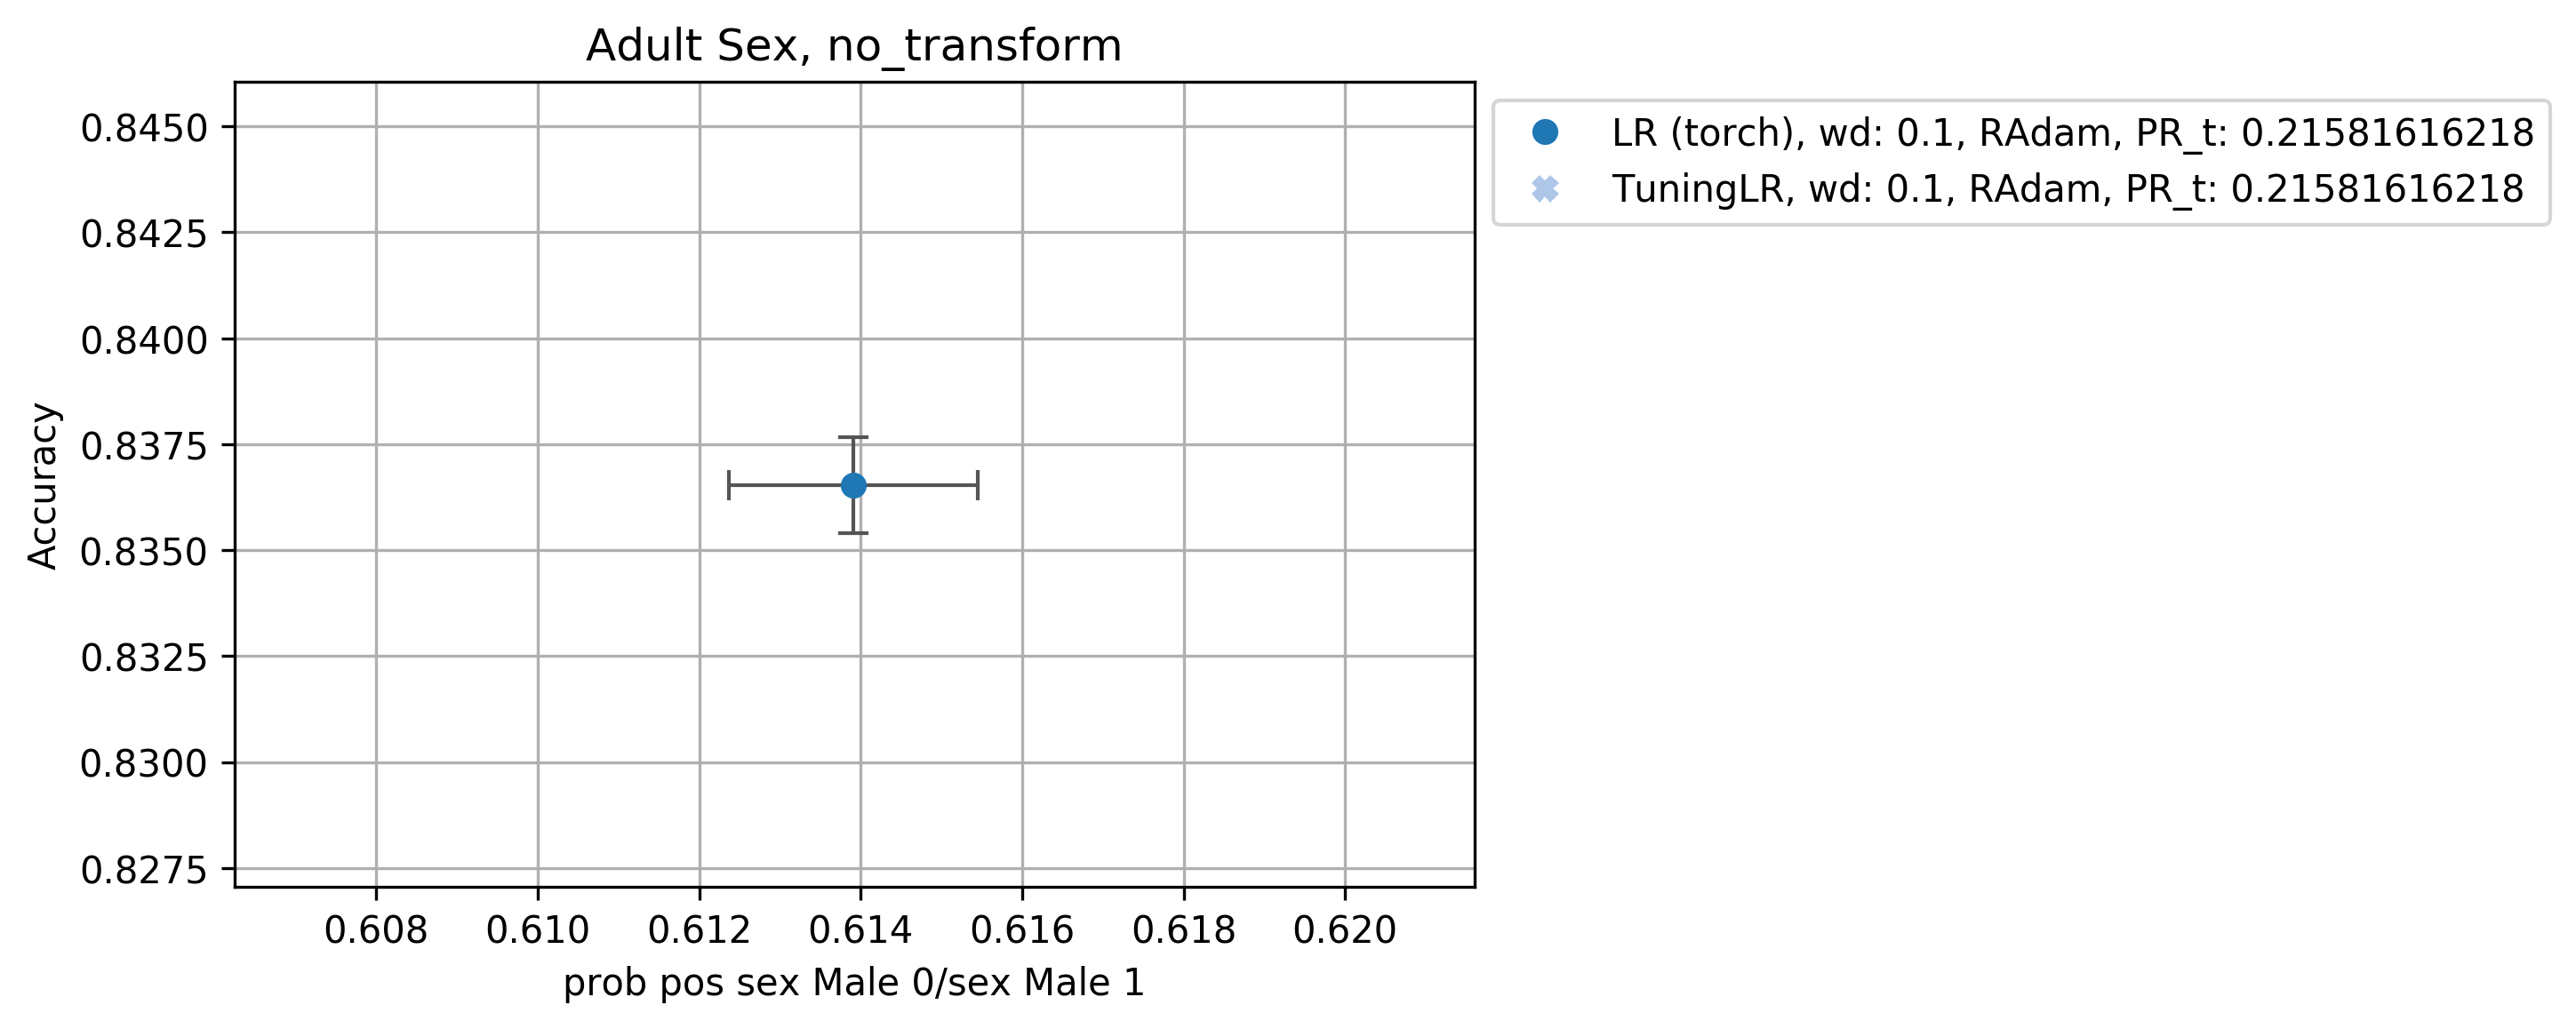

In [8]:
plot_results(
    results,#.query('not model.str.contains("PR_t: 0.1")'),
    "Accuracy",
    # "prob_pos_race_White_0/race_White_1",
    "prob_pos_sex_Male_0/sex_Male_1",
    save=False,
    ptype="cross",
)[0][0]

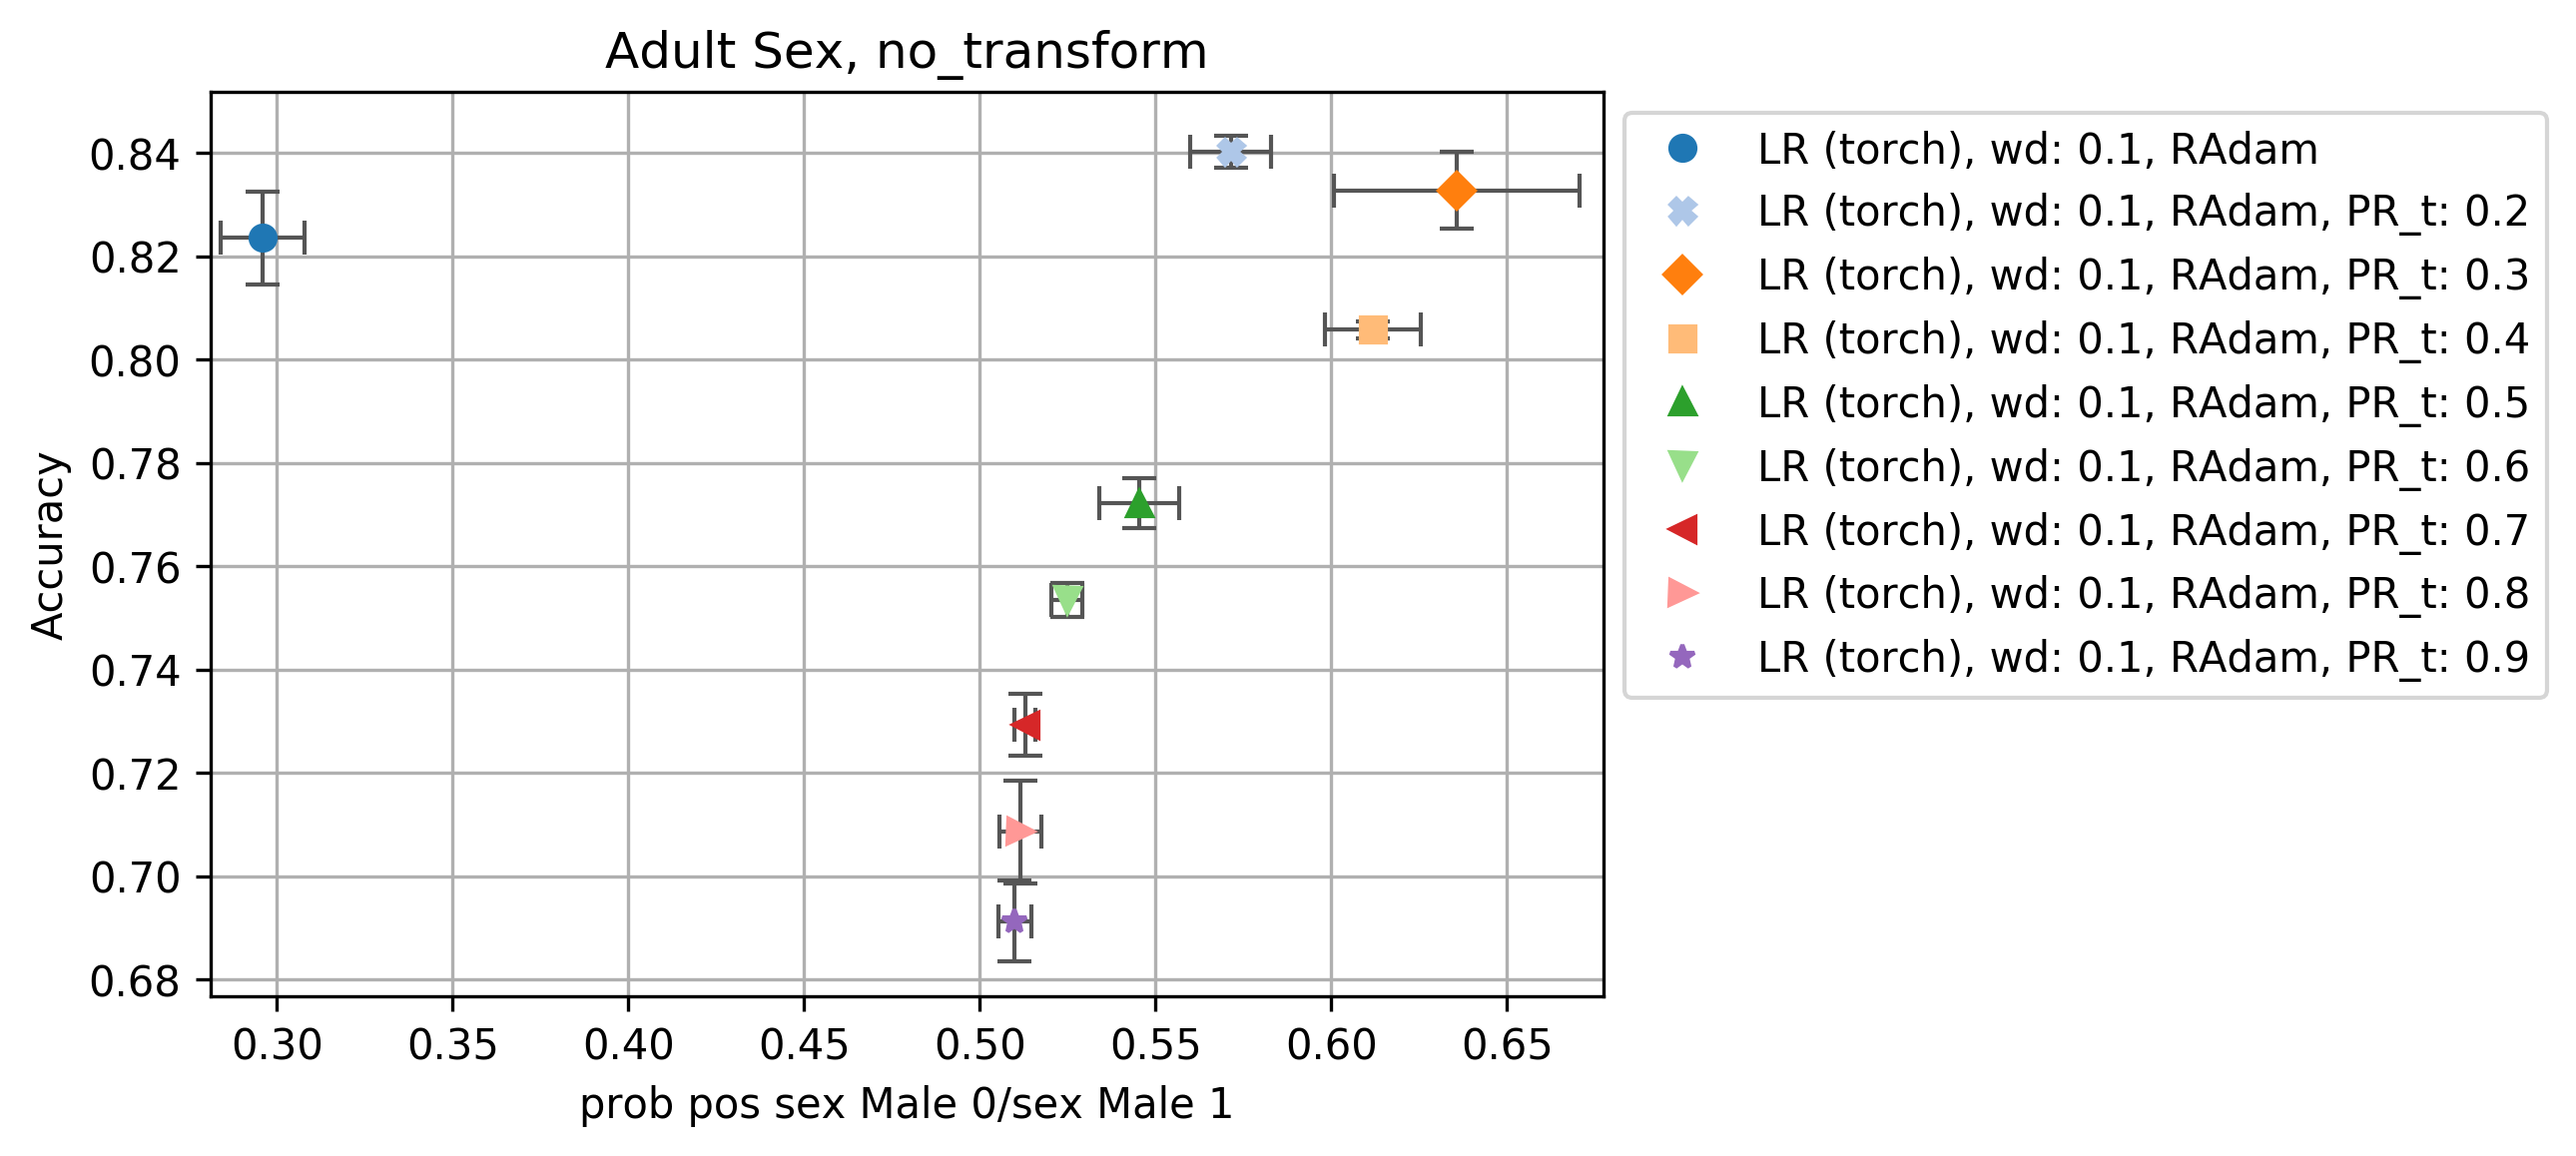

In [12]:
plot_mean_std_box(
    results.query('not model.str.contains("PR_t: 0.1")'),
    "Accuracy",
    "prob_pos_sex_Male_0/sex_Male_1",
    save=False,
    use_cross=True
)[0][0]

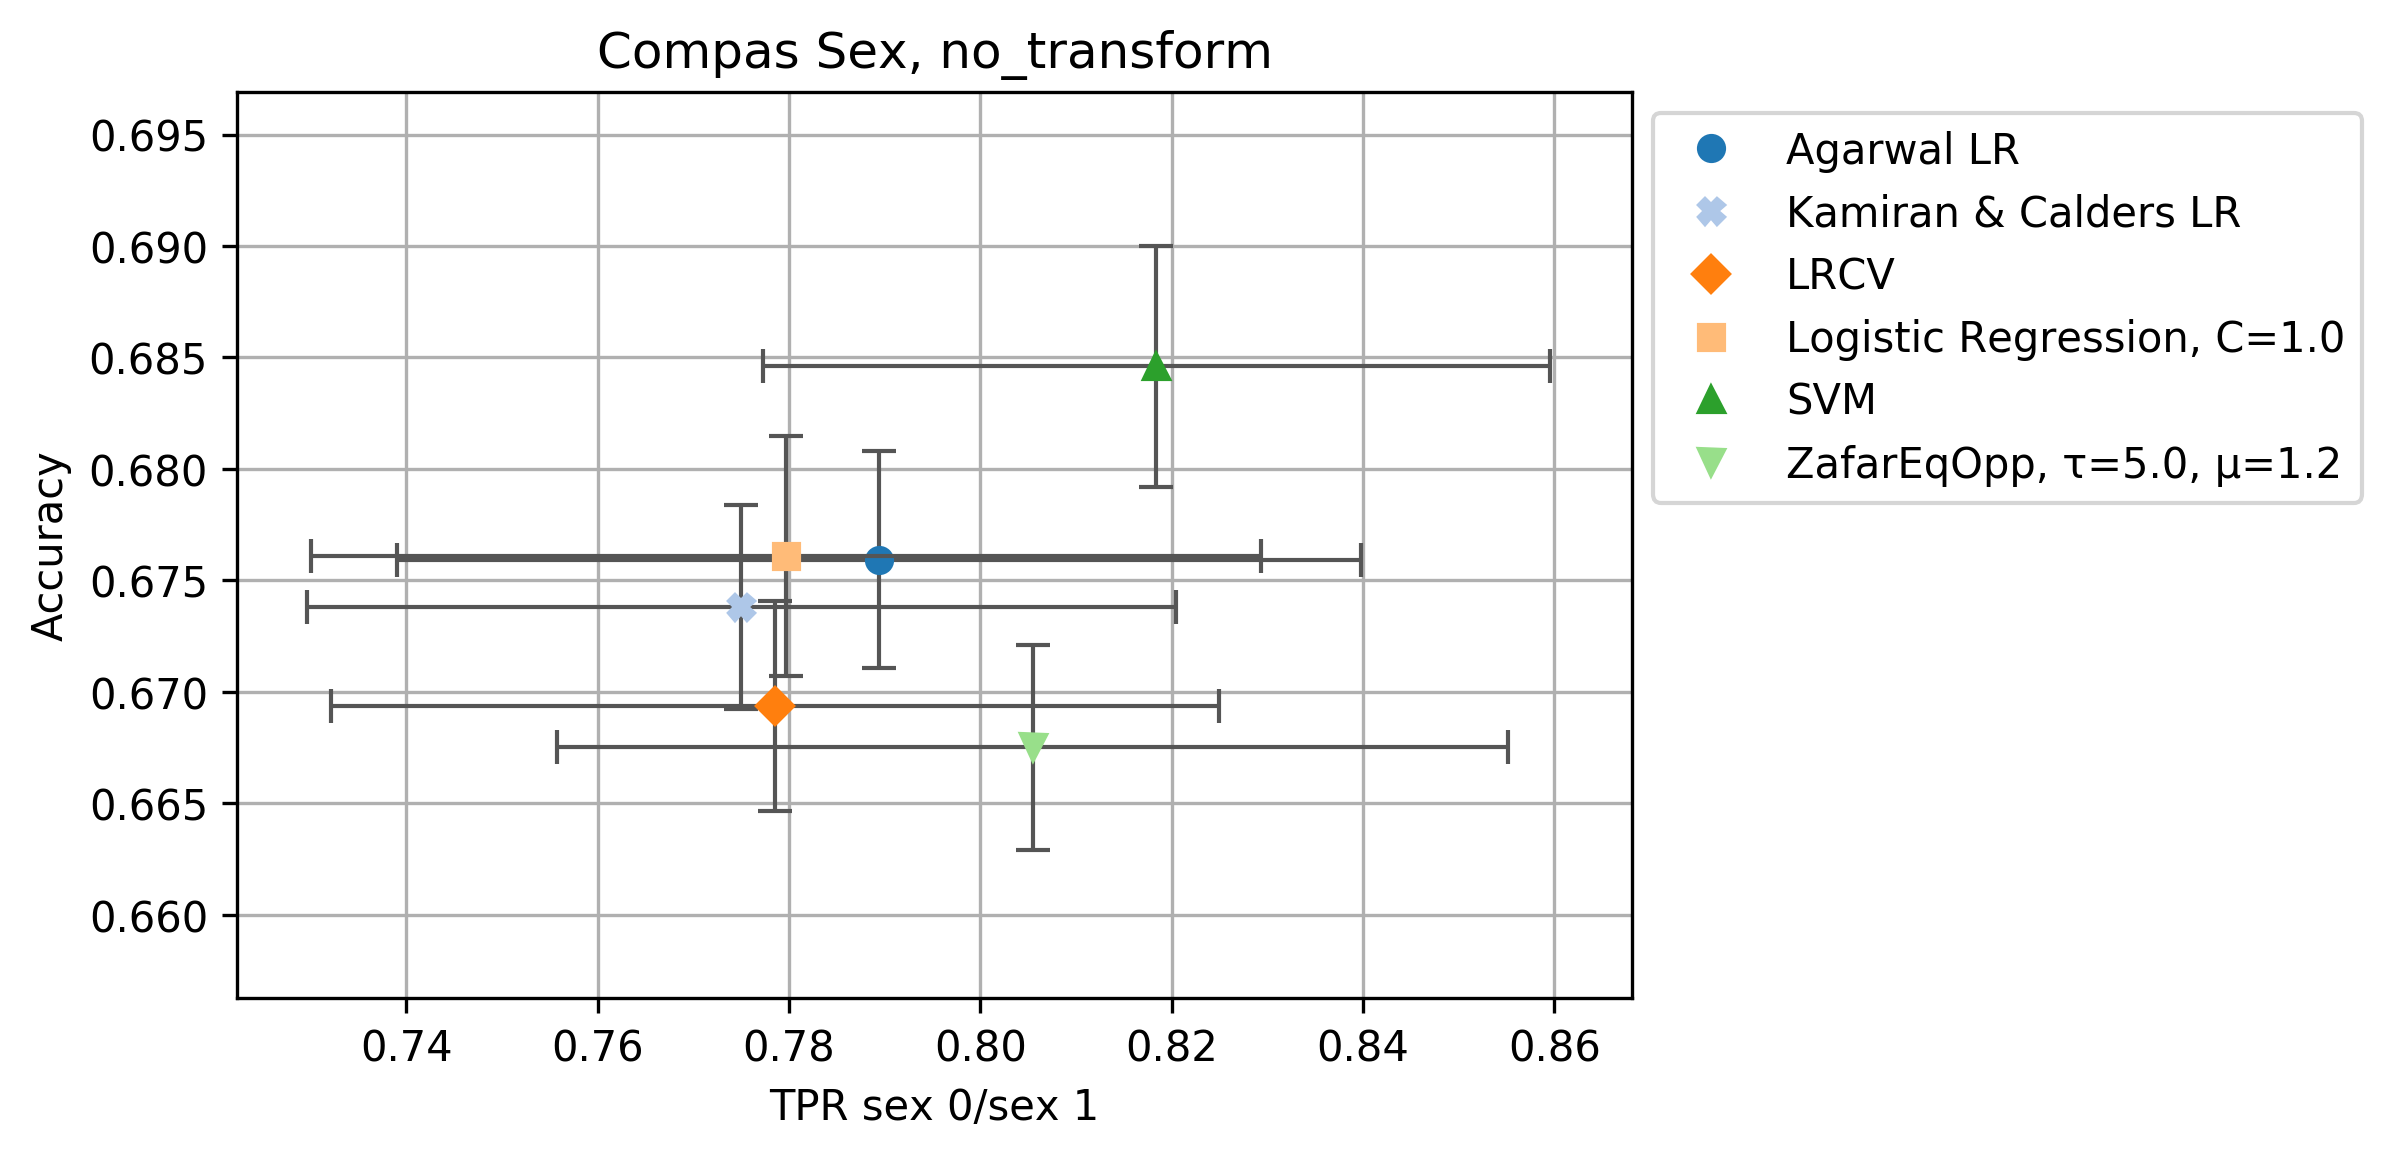

In [11]:
plot_mean_std_box(results, "Accuracy", "TPR_sex_0/sex_1", save=False, use_cross=True)[0][0]

In [ ]:
plot_mean_std_box(results.query('~model.str.contains("True")'), "Accuracy", "TPR_race_0/race_1", save=False, use_cross=True)[0][0]

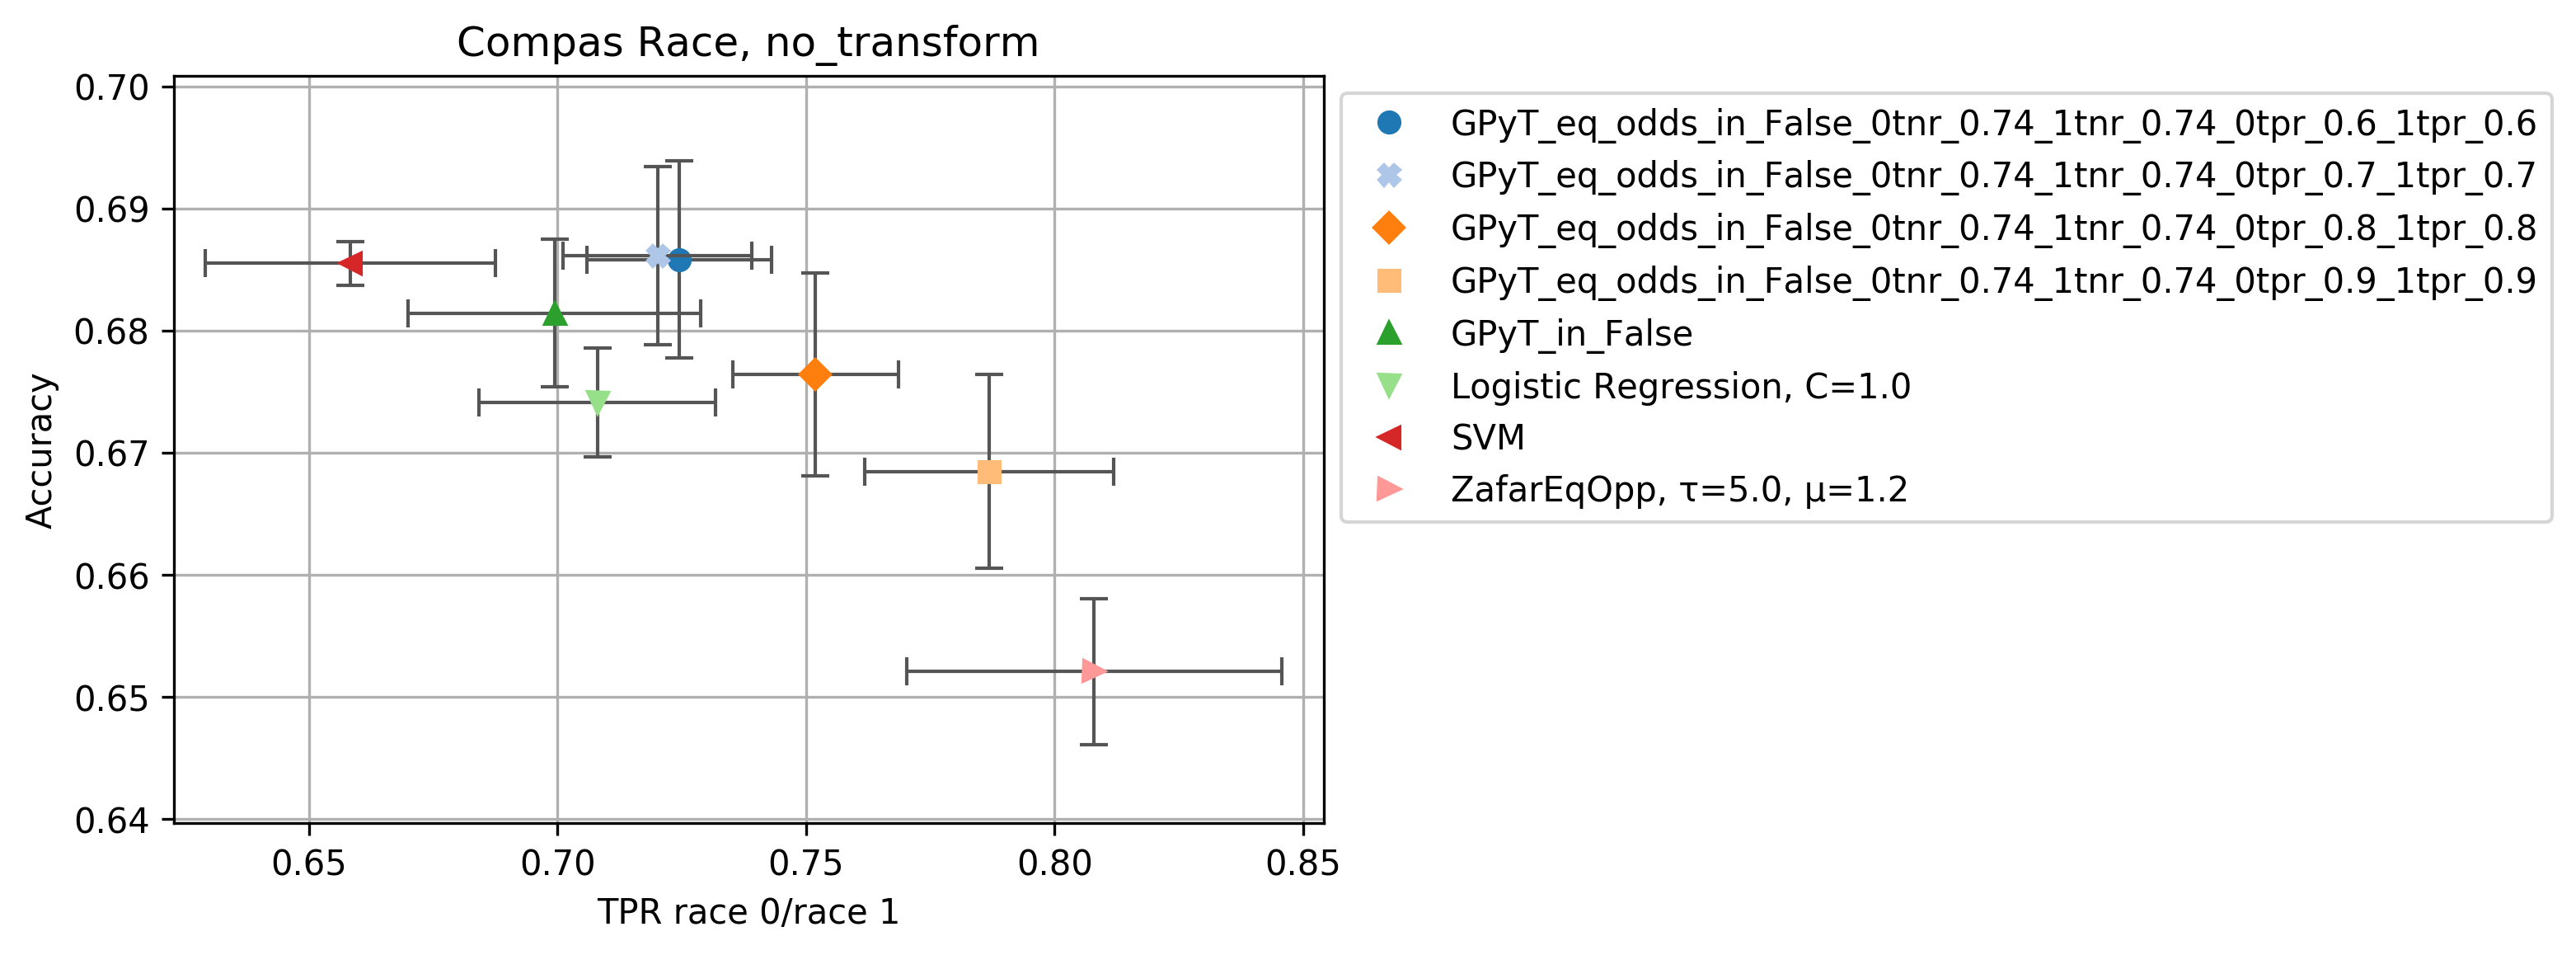

In [56]:
plot_mean_std_box(results.query('~model.str.contains("True")'), "Accuracy", "TPR_sex_0/sex_1", save=False, use_cross=True)[0][0]

In [10]:
ad = Adult("Race")
ad.sens_attrs = ['race_White']
d = load_data(ad)

In [11]:
d.s

,race_White
0,1
1,1
2,1
3,0
4,1
...,...
45217,1
45218,1
45219,1
45220,1


In [12]:
d.x

,age,capital-gain,capital-loss,education-num,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,...,relationship_Wife,sex_Female,sex_Male,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,37,0,0,10,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,33,0,0,9,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,38,0,0,7,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,23,0,0,10,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,21,0,0,4,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,28,0,0,16,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
45218,27,0,0,10,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
45219,35,0,0,13,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
45220,42,0,0,13,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
